In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV,LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\pnaik27\ML_2021\Linear_regression\Admission prediction\Admission_Prediction.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
df=df.drop(columns=['Serial No.'])
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.558763,11.103952,290.00,309.0000,316.558763,324.00,340.00
TOEFL Score,500.0,107.187755,6.051338,92.00,103.0000,107.000000,112.00,120.00
University Rating,500.0,3.118000,1.128993,1.00,2.0000,3.000000,4.00,5.00
SOP,500.0,3.374000,0.991004,1.00,2.5000,3.500000,4.00,5.00
LOR,500.0,3.484000,0.925450,1.00,3.0000,3.500000,4.00,5.00
CGPA,500.0,8.576440,0.604813,6.80,8.1275,8.560000,9.04,9.92
Research,500.0,0.560000,0.496884,0.00,0.0000,1.000000,1.00,1.00
Chance of Admit,500.0,0.721740,0.141140,0.34,0.6300,0.720000,0.82,0.97


In [5]:
df.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
df['GRE Score']=df['GRE Score'].fillna(df['GRE Score'].mean())

In [7]:
df['TOEFL Score']=df['TOEFL Score'].fillna(df['TOEFL Score'].mean())

In [11]:
df['University Rating']=df['University Rating'].fillna(df['University Rating'].mode()[0])

In [12]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

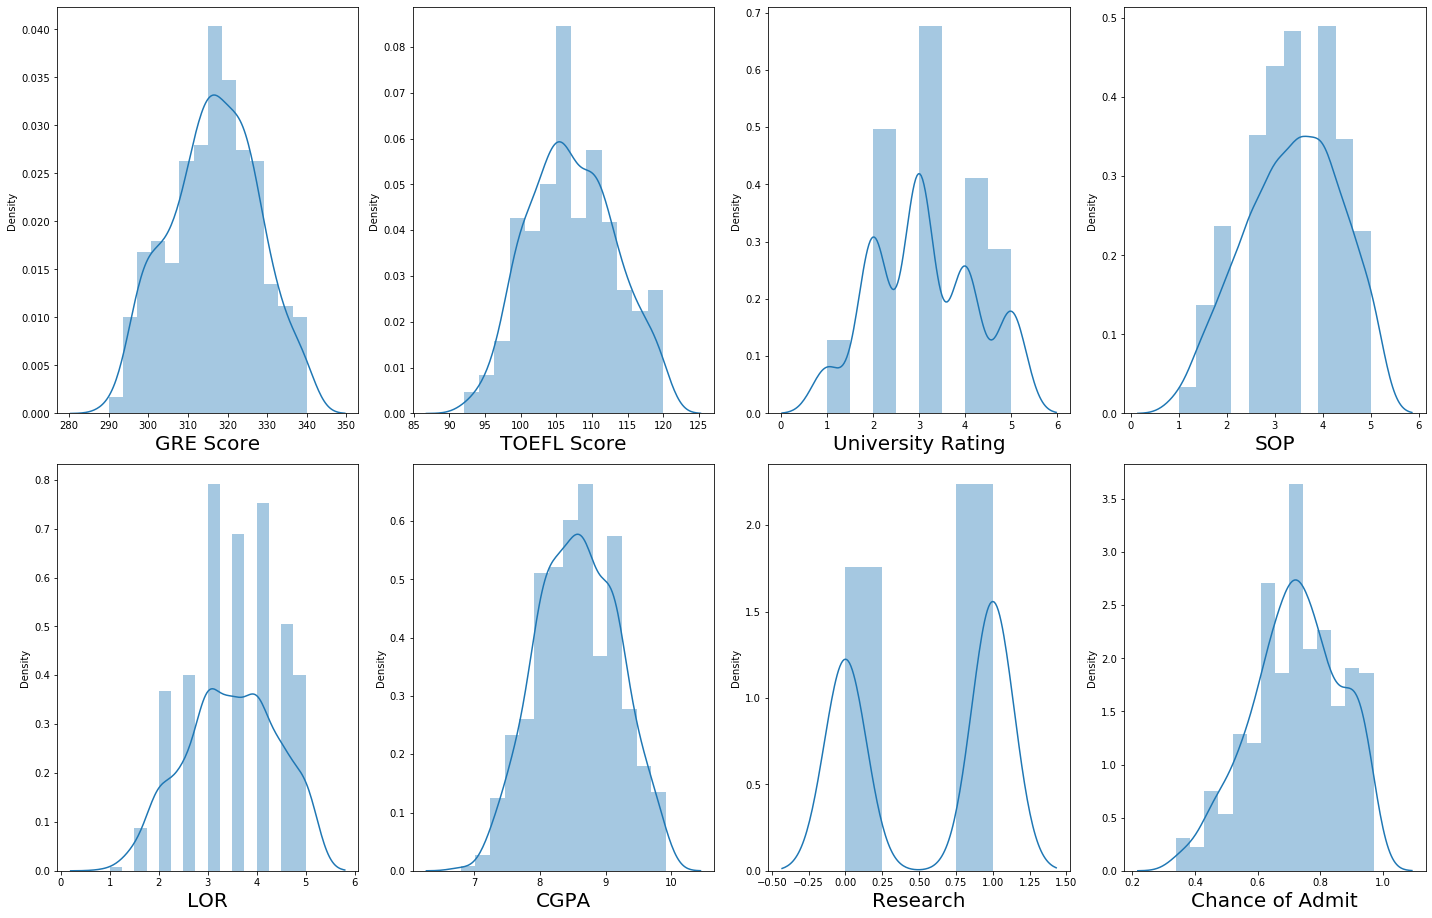

In [29]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [31]:
y=df['Chance of Admit']
X=df.drop(columns = ['Chance of Admit'])

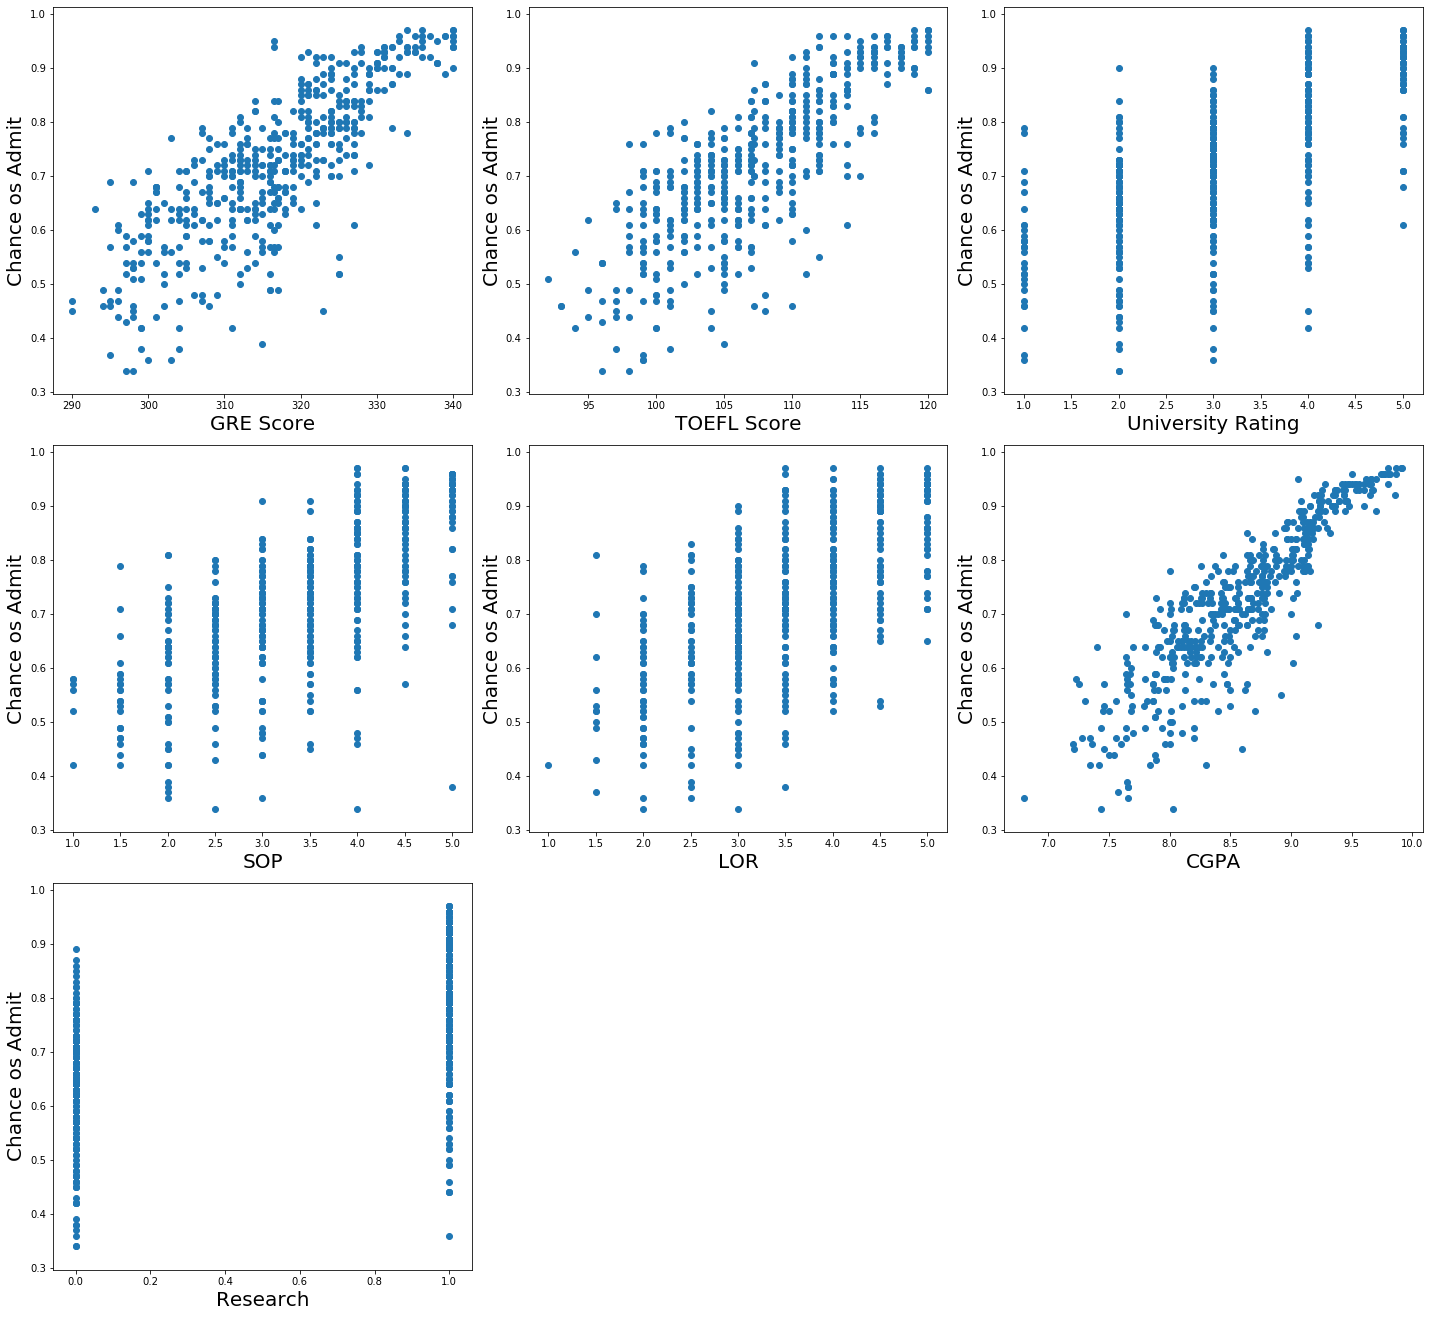

In [35]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Chance os Admit",fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [37]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables=X_scaled
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [39]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [43]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [44]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [45]:
regression.score(x_train,y_train)

0.8415250484247909

In [50]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [51]:
adj_r2(x_train,y_train)

0.8385023654247188

In [52]:
regression.score(x_test,y_test)

0.7534898831471066

In [53]:
adj_r2(x_test,y_test)

0.7387414146174464

In [54]:
lasscv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [55]:
alpha=lasscv.alpha_
alpha

3.0341655445178153e-05

In [57]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.0341655445178153e-05)

In [58]:
lasso_reg.score(x_test,y_test)

0.7534654960492284

In [69]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([8.77289769, 4.98788802, 6.97894822, 5.56860388, 5.26976598,
       9.40709881, 8.33170472, 8.74023337, 7.94187102, 1.24486844,
       6.87483748, 6.38725164, 5.33296284, 9.74761487, 9.68261972,
       9.10989381, 1.46099588, 7.3713778 , 5.10348859, 0.34627653,
       6.11385823, 7.60101987, 9.98175229, 1.73995738, 2.88647008,
       2.95290421, 3.08653672, 8.30470681, 2.63515906, 8.0980997 ,
       9.65756454, 7.49342265, 9.34627923, 1.22400845, 8.30158629,
       8.02158209, 0.73111126, 1.79146898, 4.57122815, 0.04273771,
       6.38026077, 8.12100184, 6.50551796, 6.01669548, 4.49809617,
       5.52933843, 1.80308504, 7.1714762 , 4.44303157, 5.29787645]),
        cv=10, normalize=True)

In [70]:
ridgecv.alpha_

0.04273771173240459

In [71]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.04273771173240459)

In [72]:
ridge_model.score(x_test, y_test)

0.7535108570925845

In [73]:
elasticCV=ElasticNetCV(alphas=None,cv=10)
elasticCV.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [74]:
elasticCV.alpha_

0.0011069728449315508

In [75]:
elasticCV.l1_ratio

0.5

In [76]:
elasticnet_reg=ElasticNet(alpha=elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train,y_train)

ElasticNet(alpha=0.0011069728449315508)

In [77]:
elasticnet_reg.score(x_test,y_test)

0.7531695370639867

In [78]:
import pickle
filename="Admission_prediction.pickle"
pickle.dump(regression,open(filename,'wb'))

In [79]:
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])